The frequency with the highest amplitude in the range [40000, 60000] is 46375.145454545454 Hz


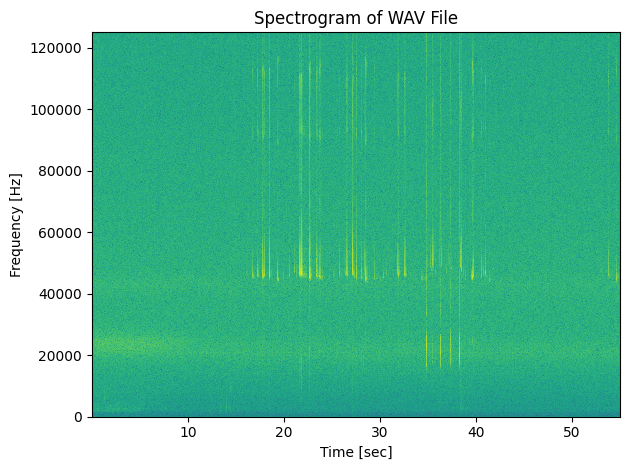

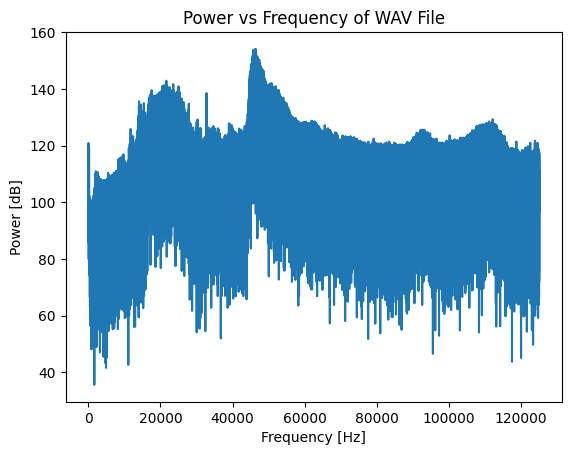

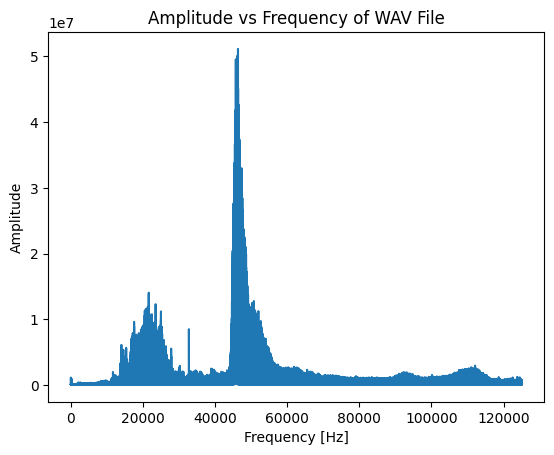

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

def get_frequency(signal, sample_rate, low_freq, high_freq):
    # Get the Fourier Transform of the signal
    fourier_transform = np.fft.fft(signal)
    frequencies = np.fft.fftfreq(signal.size, 1/sample_rate)

    # Get the amplitude of the Fourier Transform
    amplitude = np.abs(fourier_transform)
    
    # Get the frequencies in the specified range
    frequencies_in_range = frequencies[(frequencies >= low_freq) & (frequencies <= high_freq)]
    amplitude_in_range = amplitude[(frequencies >= low_freq) & (frequencies <= high_freq)]
    
    # Get the frequency with the highest amplitude
    max_amplitude_index = np.argmax(amplitude_in_range)
    frequency = frequencies_in_range[max_amplitude_index]
    
    return frequency


def plot_spectrogram(signal, sampling_rate):
    f, t, Sxx = spectrogram(signal, fs=sampling_rate, nperseg=5000, noverlap=12)
    plt.pcolormesh(t, f, np.log(Sxx), cmap='viridis')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title('Spectrogram of WAV File')
    # plt.colorbar()
    plt.tight_layout()
    plt.show()    

def plot_amplitude_vs_frequency(frequencies, amplitude):
    positive_frequency_indices = frequencies > 0
    plt.plot(frequencies[positive_frequency_indices], amplitude[positive_frequency_indices])
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude')
    plt.title('Amplitude vs Frequency of WAV File')
    plt.show()

def x_plot_power_vs_frequency(frequencies, amplitude):
    power = np.square(amplitude)
    power_in_dB = 10 * np.log10(power)
    plt.plot(frequencies, power_in_dB)
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power [dB]')
    plt.title('Power vs Frequency of WAV File')
    plt.show()  

def plot_power_vs_frequency(frequencies, amplitude):
    power = np.square(amplitude)
    power_in_dB = 10 * np.log10(power)
    positive_frequency_indices = frequencies > 0
    plt.plot(frequencies[positive_frequency_indices], power_in_dB[positive_frequency_indices])
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Power [dB]')
    plt.title('Power vs Frequency of WAV File')
    plt.show()      

# Load the WAV file
sample_rate, signal = wavfile.read('/Users/bill/Documents/AudioMoth/test/bats/20220914_201400T.WAV')

# Get the frequency with the highest amplitude in the specified range
frequency = get_frequency(signal, sample_rate, 40000, 60000)
print(f'The frequency with the highest amplitude in the range [40000, 60000] is {frequency} Hz')

# Get the spectrogram of the audio data
plot_spectrogram(signal, sample_rate)

# Get the amplitude versus frequency of the audio data
frequencies = np.fft.fftfreq(signal.size, 1/sample_rate)
amplitude = np.abs(np.fft.fft(signal))
plot_power_vs_frequency(frequencies, amplitude)
plot_amplitude_vs_frequency(frequencies, amplitude)
